# Part-1 : Section A
Training a multi-exit ElasticBERT model on SST-2 dataset

In [1]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

## 에러분석을 위해 추가한 cell

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ['CUDA_VISIBLE_DEVICES']='2'
# os.environ["CUDA_LAUNCH_BLOCKING"]="1"

## issue 152번을 참고하기

In [3]:
# The code closely follows the original ElasticBERT repository
# Feature to train models with a given exit configuration is added
# !git clone https://github.com/MLiONS/MutiExitDNNs.git


%cd /home/divya/UBERT/MutiExitDNNs/ElasticBERT
# !pip install -r requirements.txt

## 현재 위치 변경

[Errno 2] No such file or directory: '/home/divya/UBERT/MutiExitDNNs/ElasticBERT'
/home/aix7101/jeong/CeeBERT


/home/aix7101/anaconda3/envs/j_ceebert/lib/python3.9/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [4]:
# pwd

# 현재 위치 확인

In [5]:
#All the hyper-parameters/ location to training dataset are set in
#MultiExitDNNs -> finetune-dynamic -> finetune_elue_entropy.sh file
"""모든 hyper-parameter는 multiExitDNNs/finetune-dynamic/finetune_elue_entropy.sh에 기재되어있음"""

#1)Set the correct location to SST-2 dataset
"""SST-2 데이터셋을 올바른 곳에 위치시키기"""
#All models are trained on SST-2 "train" split and evaluated on "dev" split
#"train.tsv" and "dev.tsv" are expected to be in ELUE_DIR/TASK_NAME
#You can set both ELUE_DIR and TASK_NAME in finetune_elue_entropy.sh
#Or change the dataset directory using "data_dir" option
"""모든 모델은 SST-2의 train에 대해 학습된다. (train은 train/dev로 split)
위치는 ELUE_DIR/TASK_NAME에 저장되고, ELUE_DIR, TASK_NAME 모두 finetune_elue_entropy.sh에서 수정 가능
데이터 위치도 data_dir를 통해 수정할 수 있음"""

#2)Please change the "num_output_layers" option as per the desired exit-configuration
"num_output_layers를 exit-configuration에 맞게 바꾸기"

#3)Model checkpoints will be saved at "output_dir" and
#logs will be available at "log_dir"
# bash finetune_elue_entropy.sh

'num_output_layers를 exit-configuration에 맞게 바꾸기'

# Part-1 : Section B
Generating the prediction matrix

In [6]:
#Evaluation on other datasets-IMDb or Yelp
# IMDB나 Yelp를 이용해서 Evaluation
"""
IMDb: 영화 감상에 대한 분류 (binary(+,-))
Yelp: 식당에 대한 리뷰 분류 (binary or 5 classes -> 여기선 binary)
"""

'\nIMDb: 영화 감상에 대한 분류 (binary(+,-))\nYelp: 식당에 대한 리뷰 분류 (binary or 5 classes -> 여기선 binary)\n'

In [7]:
import os
print(os.getcwd())

/home/aix7101/jeong/CeeBERT


In [8]:
cd ElasticBERT/finetune-dynamic

/home/aix7101/jeong/CeeBERT/ElasticBERT/finetune-dynamic


/home/aix7101/anaconda3/envs/j_ceebert/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [9]:
from transformers import BertTokenizer as ElasticBertTokenizer

#Set the current directory location inside "finetune-dynamic" folder
"""현재 directory가 finetune-dynamic이어야 아래 mudle 사용 가능"""
# cd /home/divya/UBERT/MutiExitDNNs/ElasticBERT/finetune-dynamic

from models.configuration_elasticbert import ElasticBertConfig
from models.modeling_elasticbert_entropy import ElasticBertForSequenceClassification

/home/aix7101/anaconda3/envs/j_ceebert/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
path = '/mnt/aix7101/jeong/fnlp/elasticbert-base'

In [11]:
#Set location to the best performing model
#Model checkpoints are saved at "output_dir" from Part-1: Section A
checkpoint_snli = path + '/ckpts/elue/entropy/SNLI/checkpoint-25700'
checkpoint_sst = path + '/ckpts/elue/entropy/SST-2/checkpoint-300'
checkpoint_mrpc = path + '/ckpts/elue/entropy/MRPC/checkpoint-575'
checkpoint_scitail = path + '/ckpts/elue/entropy/SciTail/checkpoint-3690'
checkpoint_rte = path + '/ckpts/elue/entropy/RTE/checkpoint-390'
checkpoint_mnli = path + '/ckpts/elue/entropy/MNLI/checkpoint-61360'
checkpoint_qnli = path + '/ckpts/elue/entropy/QNLI/checkpoint-16370'
checkpoint_qqp = path + '/ckpts/elue/entropy/QQP/checkpoint-56855'

# 모델 불러오기. 이 때 학습 데이터를 sst로 했으므로 sst만 가져옴. checkpoint는 왜 삼백으로 설정했는진 모르겠음.


In [12]:
config = ElasticBertConfig.from_pretrained(checkpoint_sst)
tokenizer = ElasticBertTokenizer.from_pretrained(checkpoint_sst)
model = ElasticBertForSequenceClassification.from_pretrained(checkpoint_sst)
#model

/home/aix7101/anaconda3/envs/j_ceebert/lib/python3.9/site-packages/transformers/modeling_utils.py:1205: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load

In [13]:
def get_args(arg_vec):
    parser = argparse.ArgumentParser()

    # Required parameters
    parser.add_argument(
        "--num_hidden_layers",
        default=None,
        type=int,
        required=True,
        help='The number of layers to import.',
    )
    parser.add_argument(
        "--num_output_layers",
        nargs = 12,
        default=None,
        type=int,
        required=True,
        help='The number of layers to output.',
    )
    parser.add_argument(
        "--data_dir",
        default=None,
        type=str,
        required=True,
        help="The input data dir. Should contain the .tsv files (or other data files) for the task.",
    )
    parser.add_argument(
        "--model_name_or_path",
        default=None,
        type=str,
        required=True,
        help="Path to pre-trained model or shortcut name.",
    )
    parser.add_argument(
        "--task_name",
        default=None,
        type=str,
        required=True,
        help="The name of the task to train selected in the list.",
    )
    parser.add_argument(
        "--output_dir",
        default=None,
        type=str,
        required=True,
        help="The output directory where the model predictions and checkpoints will be written.",
    )
    parser.add_argument(
        "--log_dir",
        default=None,
        type=str,
        required=True,
        help="The output directory where the logs will be written.",
    )
    parser.add_argument(
        "--spec_eval",
        default=None,
        type=str,
        required=False,
        help="'Set as train or test based on specific split on which to evaluate'"
    )
    parser.add_argument(
        "--patience",
        default='0',
        type=str,
        required=False,
    )
    parser.add_argument(
        "--regression_threshold",
        default=0,
        type=float,
        required=False,
    )
    parser.add_argument(
        "--early_exit_entropy",
        default='0.1',
        type=str,
        required=False,
    )
    # Other parameters
    parser.add_argument(
        "--load",
        default=None,
        type=str,
        help="The path of ckpts used to continue training."
    )
    parser.add_argument(
        "--config_name",
        default="",
        type=str,
        help="Pretrained config name or path if not the same as model_name",
    )
    parser.add_argument(
        "--tokenizer_name",
        default="",
        type=str,
        help="Pretrained tokenizer name or path if not the same as model_name",
    )
    parser.add_argument(
        "--cache_dir",
        default="",
        type=str,
        help="Where do you want to store the pre-trained models downloaded from huggingface.co",
    )
    parser.add_argument(
        "--max_seq_length",
        default=128,
        type=int,
        help="The maximum total input sequence length after tokenization. Sequences longer "
             "than this will be truncated, sequences shorter will be padded.",
    )
    parser.add_argument("--debug", action="store_true", help="Whether to use debug mode.")
    parser.add_argument("--do_train", action="store_true", help="Whether to run training.")
    parser.add_argument("--do_eval", action="store_true", help="Whether to run eval on the dev set.")
    parser.add_argument(
        "--evaluate_during_training",
        action="store_true",
        help="Run evaluation during training at each logging step.",
    )
    parser.add_argument(
        "--do_lower_case",
        action="store_true",
        help="Set this flag if you are using an uncased model.",
    )
    parser.add_argument(
        "--per_gpu_train_batch_size",
        default=8,
        type=int,
        help="Batch size per GPU/CPU for training.",
    )
    parser.add_argument(
        "--per_gpu_eval_batch_size",
        default=1,
        type=int,
        help="Batch size per GPU/CPU for evaluation.",
    )
    parser.add_argument(
        "--gradient_accumulation_steps",
        type=int,
        default=1,
        help="Number of updates steps to accumulate before performing a backward/update pass.",
    )
    parser.add_argument(
        "--learning_rate",
        default=5e-5,
        type=float,
        help="The initial learning rate for Adam.",
    )
    parser.add_argument("--weight_decay", default=0.01, type=float, help="Weight decay if we apply some.")
    parser.add_argument("--adam_epsilon", default=1e-8, type=float, help="Epsilon for Adam optimizer.")
    parser.add_argument("--max_grad_norm", default=1.0, type=float, help="Max gradient norm.")
    parser.add_argument(
        "--num_train_epochs",
        default=3.0,
        type=float,
        help="Total number of training epochs to perform.",
    )
    parser.add_argument(
        "--max_steps",
        default=-1,
        type=int,
        help="If > 0: set total number of training steps to perform. Override num_train_epochs.",
    )
    parser.add_argument("--warmup_steps", default=0, type=int, help="Linear warmup over warmup_steps.")
    parser.add_argument("--warmup_rate", default=0, type=float, help="Linear warmup over warmup_rate.")

    parser.add_argument("--logging_steps", type=int, default=500, help="Log every X updates steps.")
    parser.add_argument(
        "--save_steps",
        type=int,
        default=500,
        help="Save checkpoint every X updates steps.",
    )
    parser.add_argument(
        "--eval_all_checkpoints",
        action="store_true",
        help="Evaluate all checkpoints starting with the same prefix as model_name ending and ending with step number",
    )
    parser.add_argument("--no_cuda", action="store_true", help="Avoid using CUDA when available")
    parser.add_argument(
        "--overwrite_output_dir",
        action="store_true",
        help="Overwrite the content of the output directory",
    )
    parser.add_argument(
        "--overwrite_cache",
        action="store_true",
        help="Overwrite the cached training and evaluation sets",
    )
    parser.add_argument(
        "--not_save_model",
        action="store_true",
        help="Do not save model checkpoints"
    )
    parser.add_argument("--seed", type=int, default=6, help="random seed for initialization")

    parser.add_argument(
        "--fp16",
        action="store_true",
        help="Whether to use 16-bit (mixed) precision (through NVIDIA apex) instead of 32-bit",
    )
    parser.add_argument(
        "--fp16_opt_level",
        type=str,
        default="O1",
        help="For fp16: Apex AMP optimization level selected in ['O0', 'O1', 'O2', and 'O3']."
             "See details at https://nvidia.github.io/apex/amp.html",
    )
    parser.add_argument(
        "--local_rank",
        type=int,
        default=-1,
        help="For distributed training: local_rank",
    )
    parser.add_argument("--server_ip", type=str, default="", help="For distant debugging.")
    parser.add_argument("--server_port", type=str, default="", help="For distant debugging.")
    args = parser.parse_args(arg_vec)

    return args

In [14]:
print("model.config.num_labels =", model.config.num_labels)

model.config.num_labels = 2


In [15]:
import torch

In [16]:
##-- loss 계산을 위해 num_labels를 task에 맞춰서 변경해줘야함
## 근데 그건 task 따라서 다름 내가 하려는 건 이진분류니까 바꿔줄 필요 딱히 없음

# model.config.num_labels = 3
# model.classifier = torch.nn.Linear(model.config.hidden_size, 3)

In [17]:
# print("model.config.num_labels =", model.config.num_labels)

In [18]:
from load_data import (
    load_and_cache_examples_glue,
    load_and_cache_examples_elue,
)


def evaluate_elue_entropy(args, model, tokenizer, prefix="", eval_highway=False, entropy=0.): # eval_highway: 실제 early exit까지 활성화하여 평가
    model.elasticbert.set_early_exit_entropy(entropy) # early stop을 위한 entropy지정, entropy를 기준으로 early exit 활성화
    model.elasticbert.set_eval_state(eval_highway) # evaluation할 때 True이면 이 때도 early exit를 사용함
    model.elasticbert.reset_stats() # early exit 과정에서 생긴 내부 통계들을 리셋, 새로운 실험 시작 전에 사용

    eval_task = args.task_name.lower()
    eval_output_dir = args.output_dir

    num_op_layers = args.num_output_layers # early exit가 있는 수, 최대 12개, 12개의 값을 받아들임 (1,0으로 1이면 early exit 존재)

    results = {}
    results_all = []
    exit_layer = []
    for i in range(sum(num_op_layers)):
        results_all.append({}) # early exit 수만큼 dictionary를 results_all에 append

    ##- 데이터셋 로딩
    if args.spec_eval: # default = None / 해당 경우 train을 사용
      eval_dataset = load_and_cache_examples_elue(args, eval_task, tokenizer, data_type=args.spec_eval)
    else:
      eval_dataset = load_and_cache_examples_elue(args, eval_task, tokenizer, data_type='train')

    if not os.path.exists(eval_output_dir) and args.local_rank in [-1, 0]:
        os.makedirs(eval_output_dir)

    args.eval_batch_size = args.per_gpu_eval_batch_size * max(1, args.n_gpu)
    # Note that DistributedSampler samples randomly
    eval_sampler = SequentialSampler(eval_dataset)
    eval_dataloader = DataLoader(eval_dataset, sampler=eval_sampler, batch_size=args.eval_batch_size)

    # multi-gpu eval
    if args.n_gpu > 1 and not isinstance(model, torch.nn.DataParallel):
        model = torch.nn.DataParallel(model)

    # Eval!
    logger.info("***** Running evaluation {} *****".format(prefix))
    logger.info("  Num examples = %d", len(eval_dataset))
    logger.info("  Batch size = %d", args.eval_batch_size)
    eval_loss = 0.0
    nb_eval_steps = 0
    preds = None
    preds_all = []
    pred_tuple = []
    for i in range(sum(num_op_layers)):
        preds_all.append(None)
        pred_tuple.append(None)
    out_label_ids = None

    for batch in tqdm(eval_dataloader, desc="Evaluating"):
        labels = batch[-1]
        model.eval()
        batch = tuple(t.to(args.device) for t in batch)

        with torch.no_grad():
            inputs = {
                "input_ids": batch[0],
                "attention_mask": batch[1],
                "labels": batch[-1],
            }
            inputs["token_type_ids"] = batch[2]
            outputs = model(**inputs) # outputs = (loss, logits, hidden_states, attentions)
            tmp_eval_loss, logits = outputs[:2]

            eval_loss += tmp_eval_loss.mean().item()
        nb_eval_steps += 1
        if out_label_ids is None:
            out_label_ids = inputs["labels"].detach().cpu().numpy()
        else:
            out_label_ids = np.append(out_label_ids, inputs["labels"].detach().cpu().numpy(), axis=0)
        if not eval_highway:
            for i, pred in enumerate(preds_all):
                if pred is None:
                    preds_all[i] = logits[i].detach().cpu().numpy()
                else:
                    preds_all[i] = np.append(pred, logits[i].detach().cpu().numpy(), axis=0)
        else:
            if preds is None:
                preds = logits.detach().cpu().numpy()
            else:
                preds = np.append(preds, logits.detach().cpu().numpy(), axis=0)

    eval_loss = eval_loss / nb_eval_steps
    if args.output_mode == "classification":
        if not eval_highway:
            for i, pred in enumerate(preds_all):
                preds_all[i] = np.argmax(pred, axis = 1)
                pred_tuple[i] = pred
        else:
            preds = np.argmax(preds, axis = 1)
            pred_tuple[i] = pred

    elif args.output_mode == "regression":
        if not eval_highway:
            for i, pred in enumerate(preds_all):
                preds_all[i] = np.squeeze(pred)
        else:
            preds = np.squeeze(preds)

    if not eval_highway:
        for i, pred in enumerate(preds_all):
            if eval_task == 'rte' or 'qnli' or 'wnli' or 'qqp':
                eval_task = 'scitail'
            if eval_task == 'mnli':
                eval_task = 'snli'
            if eval_task == 'yelp':
              eval_task = 'imdb'
            result = elue_compute_metrics(eval_task, pred, out_label_ids)  # 실제 라벨과 비교해서 정확도/정밀도 등 평가 지표를 계산
            results_all[i].update(result)

    else:
        if eval_task == 'rte' or 'qnli' or 'wnli' or 'qqp':
                eval_task = 'scitail'
        if eval_task == 'mnli':
                eval_task = 'snli'
        result = elue_compute_metrics(eval_task, preds, out_label_ids)
        results.update(result)

        logger.info("***** Eval results {} *****".format(prefix))
        for key in sorted(result.keys()):
            logger.info("  %s = %s", key, str(result[key]))
            print("  %s = %s" % (key, str(result[key])))

        exiting_layer_every_ins = model.elasticbert.exiting_layer_every_ins
        exit_layer.append(exiting_layer_every_ins)

    if eval_highway:
        speed_up = model.elasticbert.log_stats()
        return results, speed_up, exit_layer

    if args.spec_eval:
      return results_all, preds_all, pred_tuple, out_label_ids

    return results_all, preds_all, pred_tuple , out_label_ids
    #return results_all, preds_all, out_label_ids


In [19]:
ELUE_DIR='/mnt/aix7101/jeong/fnlp/elasticbert-base'
TASK_NAME='IMDb'

arg_vec= ['--model_name_or_path', 'fnlp/elasticbert-base',
  '--task_name', 'IMDb', \
  '--do_train', \
  '--do_lower_case', \
  '--data_dir', "/home/divya/UBERT/elue_data", \
  '--log_dir', '/mnt/aix7101/jeong/fnlp/elasticbert-base/log/elue/entropy/SNLI-BTestCheck', \
  '--output_dir', '/mnt/aix7101/jeong/fnlp/elasticbert-base/ckpts/elue/entropy/SNLI-BTestCheck', \
  '--num_hidden_layers', '12', \
  '--num_output_layers', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', \
  '--max_seq_length', '128', \
  '--per_gpu_train_batch_size', '32', \
  '--per_gpu_eval_batch_size',' 32', \
  '--learning_rate', '2e-5', \
  '--weight_decay', '0.1', \
  '--save_steps', '50', \
  '--logging_steps', '50', \
  '--num_train_epochs', '5',  \
  '--warmup_rate', '0.06', \
  '--evaluate_during_training', \
  '--overwrite_output_dir'
]

import argparse
parser = argparse.ArgumentParser()

args = get_args(arg_vec)

In [20]:
import torch
if args.local_rank == -1 or args.no_cuda:
    device = torch.device("cuda" if torch.cuda.is_available() and not args.no_cuda else "cpu")
    args.n_gpu = torch.cuda.device_count()
else:  # Initializes the distributed backend which will take care of sychronizing nodes/GPUs
    torch.cuda.set_device(args.local_rank)
    device = torch.device("cuda", args.local_rank)
    torch.distributed.init_process_group(backend="nccl")
    args.n_gpu = 1
args.device = device

args.output_mode = 'classification'

print(args.device)
model.to(args.device)
print(args.n_gpu)

cuda
1


In [21]:
# !git clone https://github.com/hsm207/imdb_data.git

In [22]:
# %cd imdb_data
# !pip install -r requirements.txt

In [23]:
# !tf_upgrade_v2 --infile create_imdb_dataset.py --outfile bar.py

In [24]:
# !python bar.py --output_dir /home/divya/UBERT/elue_data/imdb_data/imdb_dataset

In [25]:
#Custom Selection
# dataset = 'SNLI'#'IMDb' #or 'Yelp'
# data_split = 'train'
#To check model performance on SST-2 dev split:
#Please set dataset = 'SST-2' and data_split='dev'
dataset = 'IMDb'
data_split='train'

In [26]:
import numpy as np
import pandas as pd

def get_preds(eval_dataset='SNLI', data_split='train'):
  args.spec_eval = False
  args.task_name = eval_dataset.lower()
  args.data_dir=ELUE_DIR + '/'+args.task_name

  results_all, exit_preds, pred_tuple, op_labels = evaluate_elue_entropy(args, model, tokenizer)


  # exit_preds_list = np.stack(exit_preds, axis=1)
  # df = pd.DataFrame((exit_preds_list) )
  # df['op_labels'] = op_labels

  return  results_all, exit_preds, pred_tuple, op_labels

In [27]:
# from datasets import load_dataset
# import pandas as pd
# import os

# # 1. SNLI 데이터셋 불러오기
# dataset = load_dataset("snli", split="train")

# # 2. 사용할 컬럼만 선택 (라벨이 유효한 것만 필터링)
# filtered = dataset.filter(lambda x: x['label'] != -1)

# # 3. 데이터프레임으로 변환
# df = pd.DataFrame({
#     "premise": filtered["premise"],
#     "hypothesis": filtered["hypothesis"],
#     "label": filtered["label"]
# })

# # 4. 저장 경로 설정
# save_dir = "/mnt/aix7101/jeong/fnlp/elasticbert-base/snli"
# os.makedirs(save_dir, exist_ok=True)
# save_path = os.path.join(save_dir, "train.tsv")

# # 5. TSV 파일로 저장
# df.to_csv(save_path, sep="\t", index=False)

# print(f"✅ Saved SNLI train.tsv to: {save_path}")

In [28]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

이미 모델을 GPU에 올린 적이 있으면 해당 데이터에서 에러가 날 수 있으므로 아예 restart하는 것도 좋은 방법임

In [29]:
from elue import elue_compute_metrics
import logging
logger = logging.getLogger(__name__)
from torch.utils.data import DataLoader, SequentialSampler
from torch.utils.data.distributed import DistributedSampler
import os
from tqdm import tqdm
results, final_preds, pred_tuple, op_labels = get_preds(eval_dataset=dataset, data_split=data_split)

/home/aix7101/jeong/CeeBERT/ElasticBERT/finetune-dynamic/load_data.py:112: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  features = torch.load(cached_features_file)
Evaluati

In [30]:
(len(pred_tuple[-1]))

25000

In [31]:
print(len(op_labels))
print(len(final_preds))
print(len(final_preds[0]))   

25000
7
25000


In [32]:
accurac_imd = []
for j in range(sum(args.num_output_layers)):
    accuracy = 0
    for i in range(len(op_labels)):
        if final_preds[j][i] == op_labels[i]:
            accuracy+=1
        else:
            pass
    accurac_imd.append(accuracy/len(op_labels))

In [53]:
accurac_imd

[0.5, 0.49992, 0.63572, 0.7302, 0.73108, 0.78084, 0.81032]

In [33]:
# accurac_yelp = []
# for j in range(sum(args.num_output_layers)):
#     accuracy = 0
#     for i in range(len(op_labels)):
#         if final_preds[j][i] == op_labels[i]:
#             accuracy+=1
#         else:
#             pass
#     accurac_yelp.append(accuracy/len(op_labels))

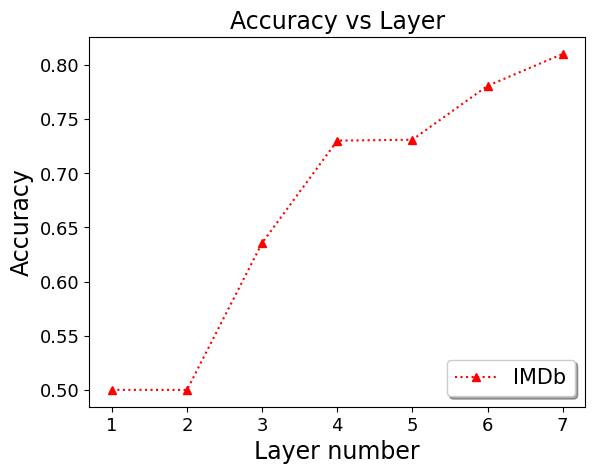

In [34]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7]
plt.plot(x, accurac_imd, linestyle='dotted', marker = '^', color="r")
# plt.plot(x, accurac_yelp, linestyle='dotted', marker = 'o', color="g")
plt.xlabel("Layer number", fontsize = 17)
plt.ylabel("Accuracy", fontsize = 17)
plt.title("Accuracy vs Layer", fontsize = 17)
plt.legend(['IMDb'],
        prop = {'size' : 15},
        loc = 'lower right', shadow = True,
        facecolor = 'white')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig("/home/aix7101/jeong/CeeBERT/ElasticBERT/Accuracy_vs_layer_Imdb and yelp.pdf")
plt.show()

In [35]:
import numpy as np
import math
import scipy
def softmax(x):
    return(np.exp(x)/np.exp(x).sum())

In [36]:
pred_prob_thi = []
for i in range(len(pred_tuple[0])):
    pred_prob_thi.append(max(softmax(pred_tuple[2][i])))
# pred_proba_thi

In [37]:
pred_prob_six = []
for i in range(len(pred_tuple[0])):
    pred_prob_six.append(max(softmax(pred_tuple[5][i])))
# pred_proba_fou

In [38]:
pred_prob_las = []
for i in range(len(pred_tuple[0])):
    pred_prob_las.append(max(softmax(pred_tuple[-1][i])))
pred_prob_las

[np.float32(0.5490912),
 np.float32(0.8932002),
 np.float32(0.8223526),
 np.float32(0.7375171),
 np.float32(0.8437855),
 np.float32(0.9293963),
 np.float32(0.8543703),
 np.float32(0.7049185),
 np.float32(0.88025826),
 np.float32(0.66299534),
 np.float32(0.7298023),
 np.float32(0.79754454),
 np.float32(0.9266994),
 np.float32(0.876034),
 np.float32(0.5074671),
 np.float32(0.9137964),
 np.float32(0.9015699),
 np.float32(0.9002454),
 np.float32(0.8773809),
 np.float32(0.84488887),
 np.float32(0.6867731),
 np.float32(0.8169792),
 np.float32(0.833848),
 np.float32(0.79851764),
 np.float32(0.87293166),
 np.float32(0.73482823),
 np.float32(0.8868725),
 np.float32(0.5308803),
 np.float32(0.8013094),
 np.float32(0.74192166),
 np.float32(0.920821),
 np.float32(0.8513628),
 np.float32(0.56488514),
 np.float32(0.79011965),
 np.float32(0.888481),
 np.float32(0.7829671),
 np.float32(0.89185804),
 np.float32(0.84108067),
 np.float32(0.9183559),
 np.float32(0.69913197),
 np.float32(0.8325104),
 np.flo

In [39]:
len(final_preds[0])

25000

In [40]:
max(pred_prob_thi)

np.float32(0.69726133)

In [41]:
op_labels_1 = []
for i in op_labels:
    if i == 0:
        op_labels_1.append(1)
    elif i==1:
        op_labels_1.append(2)
    else:
        op_labels_1.append(0)

In [42]:
df = pd.DataFrame(list(zip(final_preds[2],final_preds[5], final_preds[-1], pred_prob_thi, pred_prob_six, pred_prob_las, op_labels_1)), columns =['Thi_layer_P','Six_layer_P', 'Last_layer','PProb_thi', 'PProb_six', 'PProb_las', 'True_labels'])

In [43]:
print(df.shape[0])

25000


In [44]:
# df1 = pd.DataFrame(list(zip(final_preds[0], final_preds[1], final_preds[2], final_preds[3], final_preds[4], final_preds[5], final_preds[6], final_preds[7], final_preds[8], final_preds[9], final_preds[10], final_preds[11], op_labels)), columns =['Fir_p', 'Sec_p', 'Thi_p', 'Fou_p', 'Fiv_p', 'Six_p', 'Sev_p', 'Eig_p', 'Nin_p', 'Ten_p', 'Ele_p', 'Twe_p', 'True_labels'])

In [45]:
# df2 = pd.DataFrame(list(zip(final_preds[0], final_preds[1], final_preds[2], final_preds[3], final_preds[4], final_preds[5], final_preds[6], op_labels)), columns =['Fir_p', 'Thi_p', 'Fou_p', 'Fiv_p', 'Sev_p', 'Nin_p', 'Twe_p', 'True_labels'])

In [47]:
(df.head(5))

,Thi_layer_P,Six_layer_P,Last_layer,PProb_thi,PProb_six,PProb_las,True_labels
0,0,1,0,0.519159,0.524096,0.549091,1
1,0,0,0,0.522993,0.832413,0.893200,1
2,1,0,0,0.548643,0.675569,0.822353,1
3,1,0,0,0.550421,0.778026,0.737517,1
4,0,0,0,0.535718,0.776057,0.843786,1


In [48]:
accuracy_imdb = []
for j in df.columns:
  accuracy = 0
  for i in range(df.shape[0]):
      if df[j][i] == df['True_labels'][i]:
          accuracy += 1
      else:
          pass
  print("Accuracy = ", accuracy/df.shape[0])
  accuracy_imdb.append(accuracy)

Accuracy =  0.65212
Accuracy =  0.39564
Accuracy =  0.39752
Accuracy =  0.0
Accuracy =  0.0
Accuracy =  0.0
Accuracy =  1.0


In [49]:
# accuracy_yelp = []
# for j in df2.columns:
#   accuracy = 0
#   for i in range(df1.shape[0]):
#       if df2[j][i] == df2['True_labels'][i]:
#           accuracy += 1
#       else:
#           pass
#   print("Accuracy = ", accuracy/df2.shape[0])
#   accuracy_imdb.append(accuracy)

In [50]:
df.to_csv("/home/aix7101/jeong/CeeBERT/ElasticBERT/Early_Exit_Confidence_data_snli_max_exits(3,6,12)_difference.csv")

In [51]:
# df.to_csv(r"/UBERT/CSV_files/Early_Exit_Confidence_data_SST2_new_exits(12,12)_difference.csv")

In [77]:
def tup_df(tuple):
    pred_prob_thi = []
    for i in range(len(tuple[2][0])):
        pred_prob_thi.append(max(softmax(tuple[2][2][i])))


    pred_prob_six = []
    for i in range(len(tuple[2][0])):
        pred_prob_six.append(max(softmax(tuple[2][5][i])))


    pred_prob_las = []
    for i in range(len(tuple[2][0])):
        pred_prob_las.append(max(softmax(tuple[2][-1][i])))

    op_labels_1 = []
    for i in tuple[3]:
        if i == 0:
            op_labels_1.append(1)
        elif i==1:
            op_labels_1.append(2)
        else:
            op_labels_1.append(0)
    return pred_prob_thi, pred_prob_six, pred_prob_las, op_labels_1

df = pd.DataFrame(list(zip(final_preds[2],final_preds[5], final_preds[-1], pred_prob_thi, pred_prob_six, pred_prob_las, op_labels_1)), columns =['Thi_layer_P','Six_layer_P', 'Last_layer','PProb_thi', 'PProb_six', 'PProb_las', 'True_labels'])

In [79]:
df_train

,Thi_layer_P,Six_layer_P,Last_layer,PProb_thi,PProb_six,PProb_las,True_labels
0,0,1,0,0.519159,0.524096,0.549091,1
1,0,0,0,0.522993,0.832413,0.893200,1
2,1,0,0,0.548643,0.675569,0.822353,1
3,1,0,0,0.550421,0.778026,0.737517,1
4,0,0,0,0.535718,0.776057,0.843786,1
...,...,...,...,...,...,...,...
24995,1,0,0,0.552878,0.543862,0.546161,2
24996,1,0,1,0.508136,0.529887,0.503065,2
24997,1,1,1,0.590671,0.816035,0.812379,2
24998,0,1,1,0.521273,0.500836,0.685543,2


In [80]:
df_train = get_preds(eval_dataset=dataset, data_split='train')
df_test = get_preds(eval_dataset=dataset, data_split='test')


a, b, c, d = tup_df(df_train)
df_train = pd.DataFrame(list(zip(df_train[1][2],df_train[1][5], df_train[1][-1], a, b, c, d)), columns =['Thi_layer_P','Six_layer_P', 'Last_layer','PProb_thi', 'PProb_six', 'PProb_las', 'True_labels'])
a, b, c, d = tup_df(df_test)
df_test = pd.DataFrame(list(zip(df_test[1][2],df_test[1][5], df_test[1][-1], a, b, c, d)), columns =['Thi_layer_P','Six_layer_P', 'Last_layer','PProb_thi', 'PProb_six', 'PProb_las', 'True_labels'])

df_tot = pd.concat([df_train, df_test])
df_tot = df_tot.reset_index(drop=True)
print(df_tot.head())

df_tot.to_csv(r'/home/aix7101/jeong/CeeBERT/ElasticBERT/Exit_Predictions_TrainTest_IMDb_8exits.csv',sep ='\t', index = False)

/home/aix7101/jeong/CeeBERT/ElasticBERT/finetune-dynamic/load_data.py:112: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  features = torch.load(cached_features_file)
Evaluati

   Thi_layer_P  Six_layer_P  Last_layer  PProb_thi  PProb_six  PProb_las  \
0            0            1           0   0.519159   0.524096   0.549091   
1            0            0           0   0.522993   0.832413   0.893200   
2            1            0           0   0.548643   0.675569   0.822353   
3            1            0           0   0.550421   0.778026   0.737517   
4            0            0           0   0.535718   0.776057   0.843786   

   True_labels  
0            1  
1            1  
2            1  
3            1  
4            1  


OSError: Cannot save file into a non-existent directory: '/home/aix7101/jeong/CeeBERT/Early_Exits_Divya/Model_exit_predictions'